In [3]:
#import libraries
import pandas as pd
import matplotlib as plt
import numpy as np

In [4]:
# Load the data from csv file to a dataset
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [5]:
# Know the size of the data
data.shape

(7043, 21)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


We can see that Toatal charges is object but it is supposed to be a numerical data type.

So we convert it to numerical. 

In [7]:
# Convert the Total Charges to numerical 
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors = 'coerce')
data['TotalCharges'].dtypes

dtype('float64')

In [8]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Total charges has 11 null valuea. Let see why are they null 

In [25]:
na_rows = data[data['TotalCharges'].isna()]
na_rows

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MultipleLines_encoded


They are null because they have a tenure of 0. This means that these customers did not use the services. So we will drop these rows.

In [10]:
# Drop null rows
data= data.dropna(subset=['TotalCharges'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [26]:
data.describe(include = 'all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MultipleLines_encoded
count,7032,7032,7032.000000,7032,7032,7032.000000,7032.000000,7032,7032,7032,...,7032,7032,7032,7032,7032,7032,7032.000000,7032.000000,7032,7032.000000
unique,7032,2,NaN,2,2,NaN,NaN,3,3,3,...,3,3,3,3,2,4,NaN,NaN,2,NaN
top,7590-VHVEG,Male,NaN,No,No,NaN,NaN,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN,No,NaN
freq,1,3549,NaN,3639,4933,NaN,NaN,3385,3096,3497,...,3472,2809,2781,3875,4168,2365,NaN,NaN,5163,NaN
mean,NaN,NaN,0.162400,NaN,NaN,32.421786,0.903299,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,64.798208,2283.300441,NaN,0.518629
std,NaN,NaN,0.368844,NaN,NaN,24.545260,0.295571,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,30.085974,2266.771362,NaN,0.499688
min,NaN,NaN,0.000000,NaN,NaN,1.000000,0.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,18.800000,NaN,0.000000
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,35.587500,401.450000,NaN,0.000000
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,1397.475000,NaN,1.000000
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,89.862500,3794.737500,NaN,1.000000


In [27]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MultipleLines_encoded
0,7590-VHVEG,Female,0,Yes,No,1,0,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1
1,5575-GNVDE,Male,0,No,No,34,1,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,0
2,3668-QPYBK,Male,0,No,No,2,1,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0
3,7795-CFOCW,Male,0,No,No,45,0,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,1
4,9237-HQITU,Female,0,No,No,2,1,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0


In [30]:
data['MultipleLines'].value_counts()

MultipleLines
No                  3385
Yes                 2967
No phone service     680
Name: count, dtype: int64

In [31]:
data['InternetService'].value_counts()

InternetService
Fiber optic    3096
DSL            2416
No             1520
Name: count, dtype: int64

In [32]:
data['OnlineSecurity'].value_counts()

OnlineSecurity
No                     3497
Yes                    2015
No internet service    1520
Name: count, dtype: int64

In [33]:
data['OnlineBackup'].value_counts()

OnlineBackup
No                     3087
Yes                    2425
No internet service    1520
Name: count, dtype: int64

In [34]:
data['DeviceProtection'].value_counts() 

DeviceProtection
No                     3094
Yes                    2418
No internet service    1520
Name: count, dtype: int64

In [35]:
data['StreamingTV'].value_counts()

StreamingTV
No                     2809
Yes                    2703
No internet service    1520
Name: count, dtype: int64

In [36]:
data['StreamingMovies'].value_counts()

StreamingMovies
No                     2781
Yes                    2731
No internet service    1520
Name: count, dtype: int64

In [37]:
data['avarage'] = data['TotalCharges'] / data['tenure']
data['avarage'].head()

0    29.850000
1    55.573529
2    54.075000
3    40.905556
4    75.825000
Name: avarage, dtype: float64

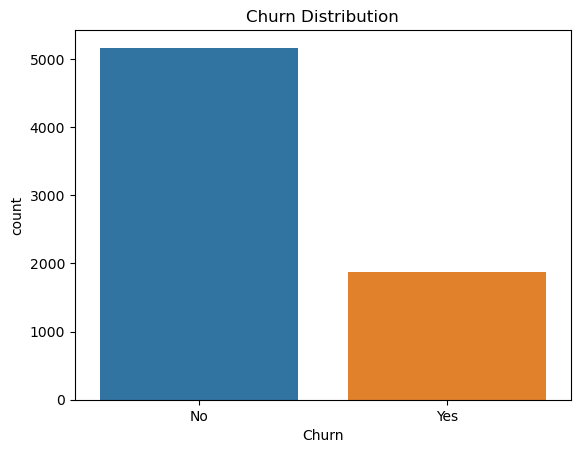

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x = 'Churn', data=data)
plt.title('Churn Distribution')
plt.show()

from the above observation we can see that most of the customers did not churn but a significant number of them churned. 

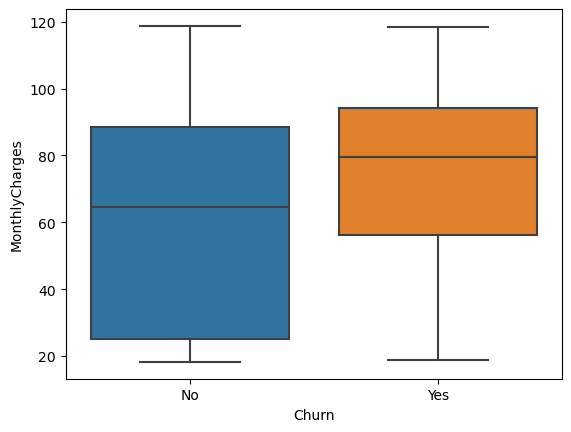

In [39]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=data)
plt.show()

The median monthly charge for customers who charned is higher compared to those who did not.

Therefore customers with high monthly charges are more likely to churn.    

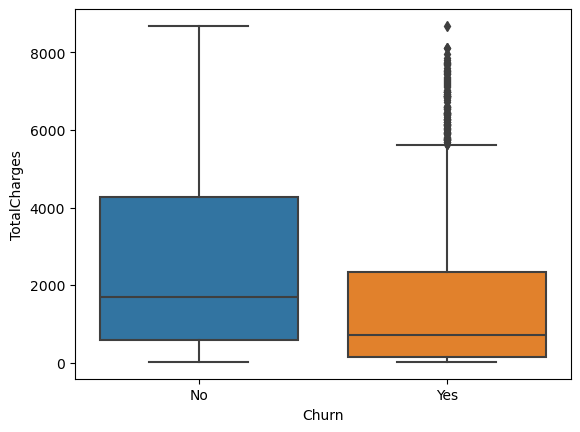

In [40]:
sns.boxplot(x='Churn', y='TotalCharges', data=data)
plt.show()

This observation suggests that customers with higher total spending are more likely to remain while less spending are more likely to churn.

In [41]:
#Handle outliers
churned = data[data['Churn'] == 'Yes']

#Calculate the quatile ranges
tq1 = churned['TotalCharges'].quantile(0.25)
tq3 = churned['TotalCharges'].quantile(0.75)
tIqr = tq3 - tq1

#Define outlier boundaries
lower_bound = tq1 - 1.5 * tIqr
upper_bound = tq3 + 1.5 * tIqr

#Filter
filtred_churned = churned[(churned['TotalCharges'] >= lower_bound) & (churned['TotalCharges'] <= upper_bound)]


# Combine the filtered churned and non churned customers
non_churned = data[data['Churn'] == 'No']
data = pd.concat([filtred_churned, non_churned])
          
data.head()           

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MultipleLines_encoded,avarage
2,3668-QPYBK,Male,0,No,No,2,1,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0,54.075000
4,9237-HQITU,Female,0,No,No,2,1,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0,75.825000
5,9305-CDSKC,Female,0,No,No,8,1,Yes,Fiber optic,No,...,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1,102.562500
8,7892-POOKP,Female,0,Yes,No,28,1,Yes,Fiber optic,No,...,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,108.787500
13,0280-XJGEX,Male,0,No,No,49,1,Yes,Fiber optic,No,...,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,1,102.781633


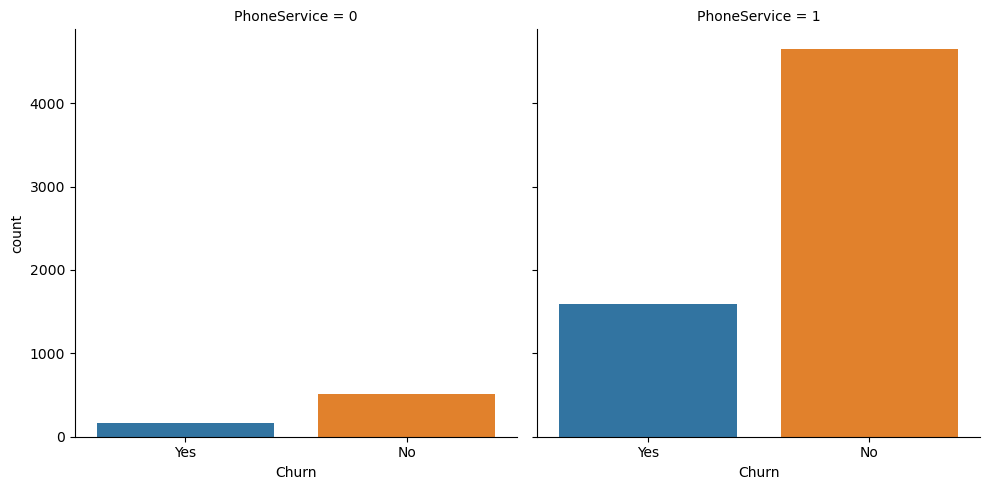

In [42]:
sns.catplot(x = 'Churn', col='PhoneService', kind='count', data=data)
plt.show()

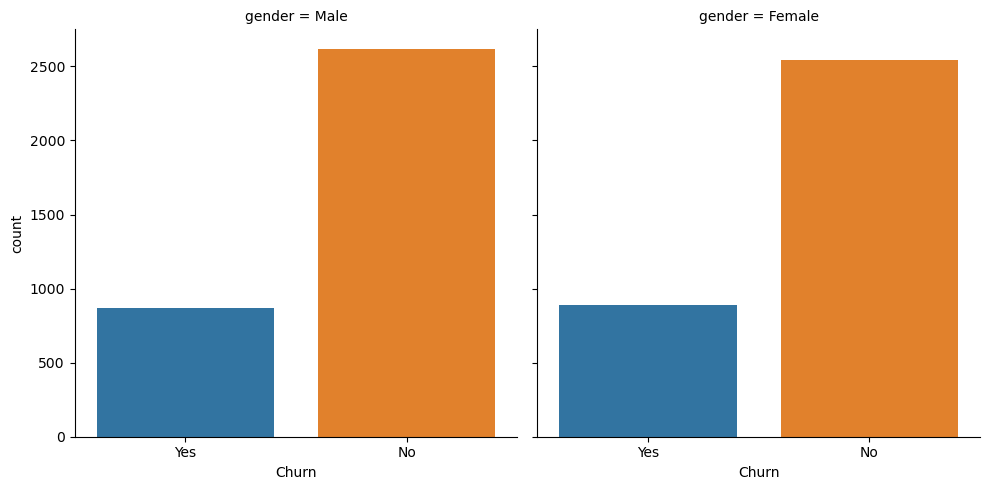

In [43]:
sns.catplot(x = 'Churn', col='gender', kind='count', data=data)
plt.show()

So from the above observation there is no any rrelationship between churn and gender. 

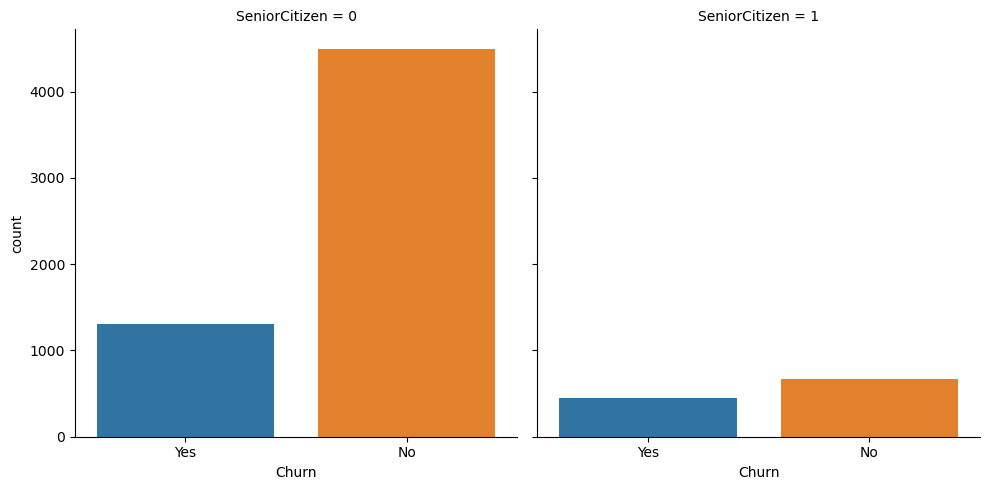

In [44]:
sns.catplot(x='Churn', col='SeniorCitizen', kind='count', data=data)
plt.show()

Senior citizens have a higher churn rate then the non-senior citizens.
So there is an issue with retaining senior citizens.

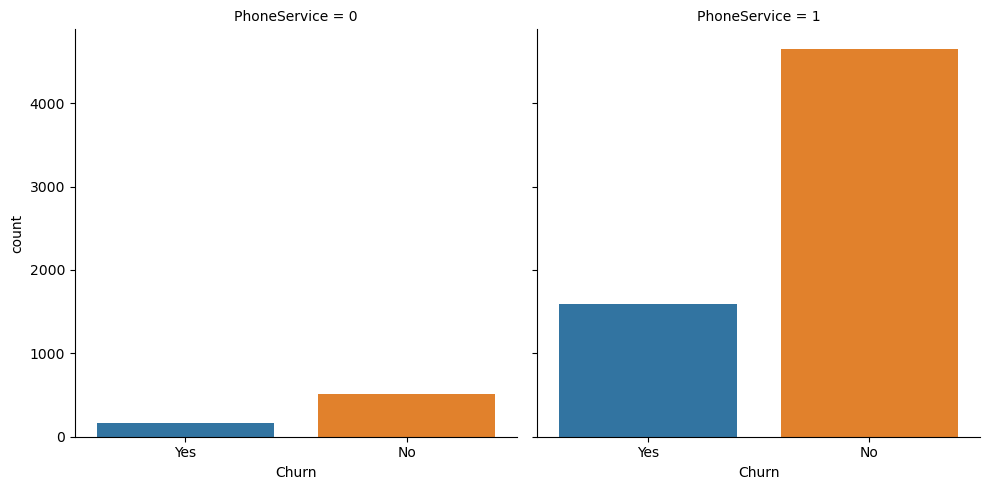

In [45]:
sns.catplot(x='Churn', col='PhoneService', kind='count', data=data)
plt.show()

Phone Service is not a desive factor on whether the customer churns or not.

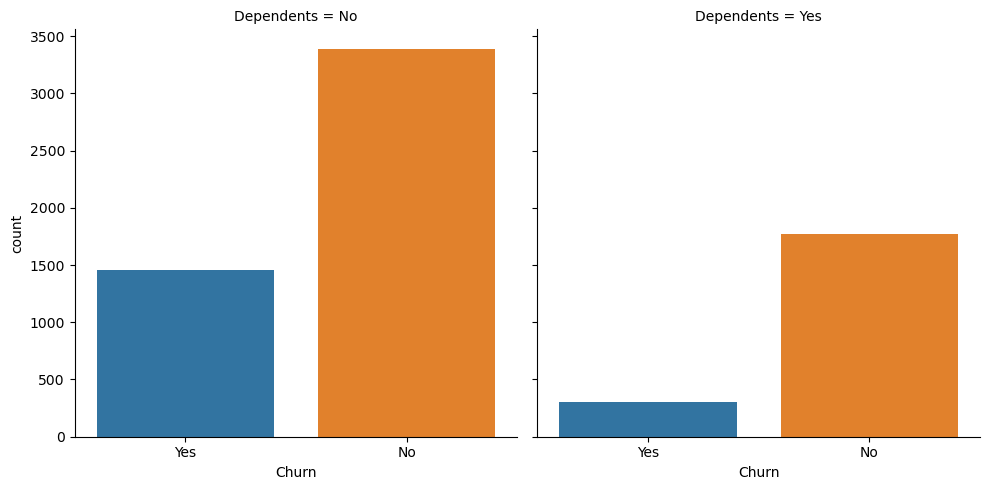

In [46]:
sns.catplot(x='Churn', col='Dependents', kind='count', data=data)
plt.show()

Dependents is also not a determining factor

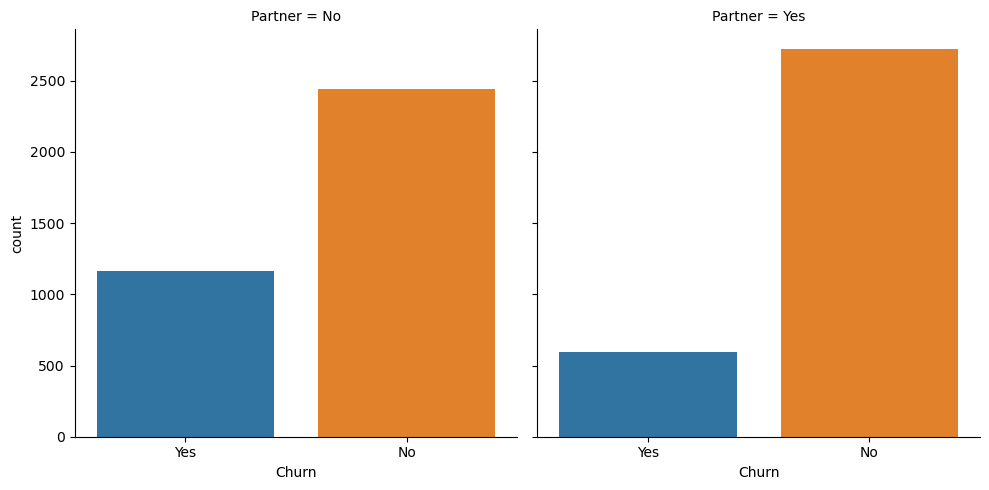

In [47]:
sns.catplot(x='Churn', col='Partner', kind='count', data=data)
plt.show()

Customers without partners are more prone to churnining compared to customers with partners.

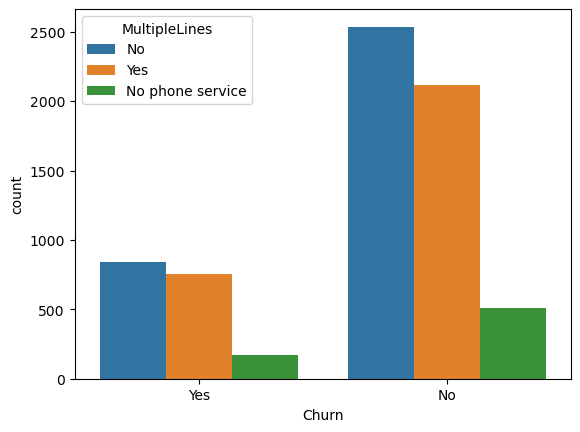

In [48]:
sns.countplot(x='Churn', hue='MultipleLines', data=data)
plt.show()

- The churn rate for those with multiple lines is higher than those without.

The chart suggests that while multiple lines might have some impact on churn, it does not appear to be a decisive factor.

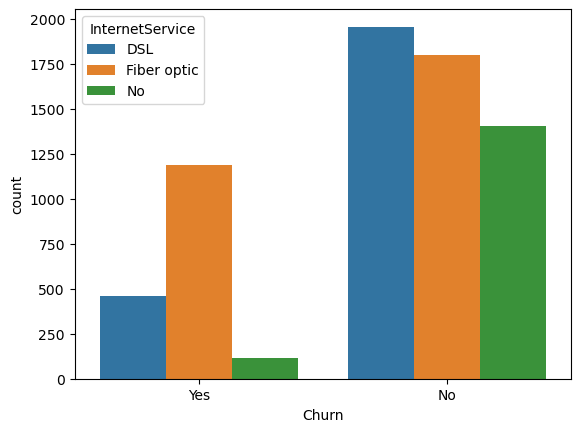

In [49]:
sns.countplot(x='Churn', hue='InternetService', data=data)
plt.show()

- Customers with fiber optic service seem to have a higher churn rate compared to those with DSL or no internet service. This might indicate dissatisfaction with fiber optic service.

- The chart indicates that the type of internet service is a factor in customer churn.

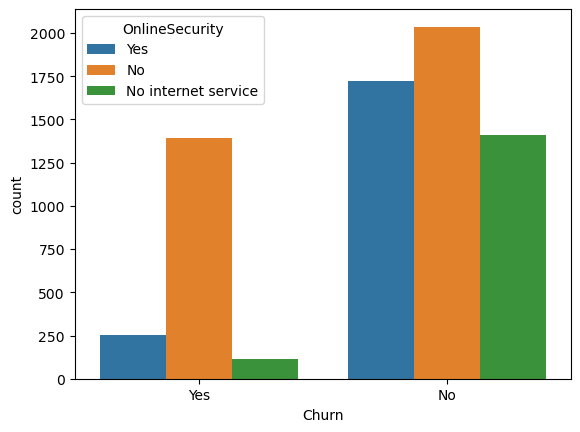

In [50]:
sns.countplot(x='Churn', hue='OnlineSecurity', data=data)
plt.show()

There is a signficant number of churn for customers with no internet security despite that a big number did not not churn. 

Customers without online security have high probability of churn compared to those with it. Therefore online security is a factor in customer churn. 

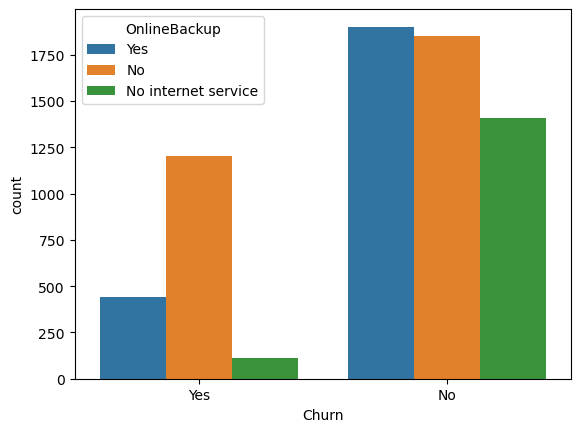

In [51]:
sns.countplot(x='Churn', hue='OnlineBackup', data=data)
plt.show()

There is a high churn rate for customers without online buckup compared to those with it.

This suggests that online backup is also a factor.

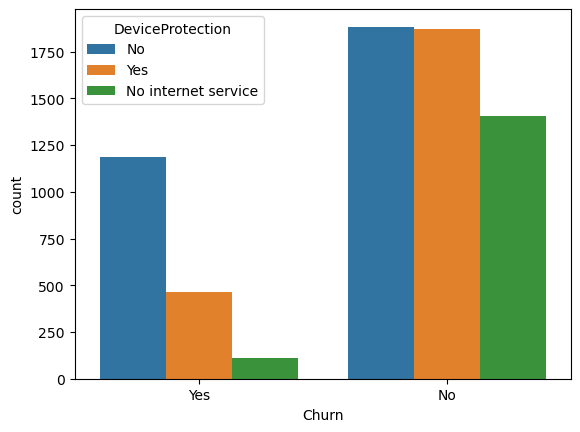

In [52]:
sns.countplot(x='Churn', hue='DeviceProtection', data=data)
plt.show()

High churn rate for customers without device protection.

This suggests that having device protection might help reduce the likelihood of churn.

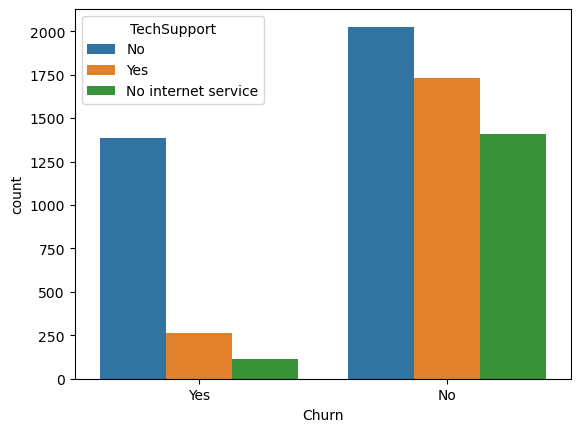

In [53]:
sns.countplot(x='Churn', hue='TechSupport', data=data)
plt.show()

There is high churn rate for customers with no tech support.

Providing tech support to customers might also reduce the chances of customer churn.

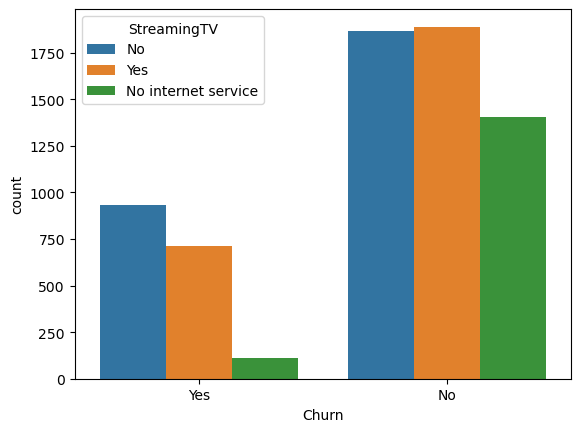

In [54]:
sns.countplot(x='Churn', hue='StreamingTV', data=data)
plt.show()

There is a small high churn rate for customers who are not streming tv. But Streaming tv does not have  signifcant effect on churn. 

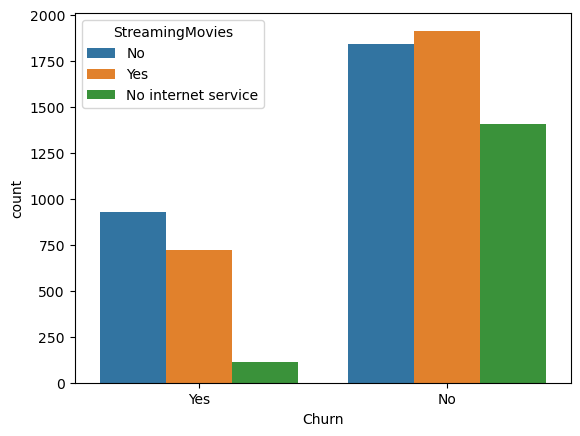

In [55]:
sns.countplot(x='Churn', hue='StreamingMovies', data=data)
plt.show()

Streaming Movie might not be a significant factor in determining churn

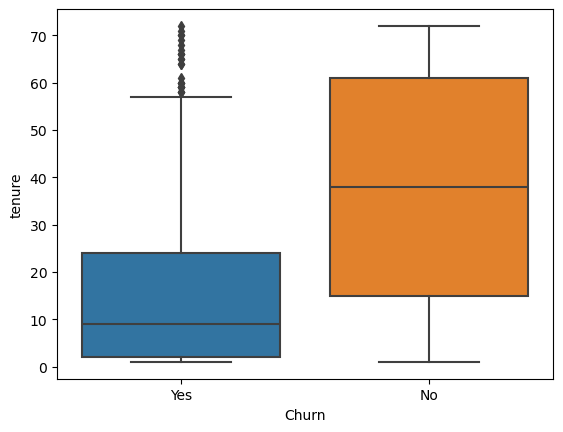

In [56]:
sns.boxplot(x='Churn', y='tenure', data=data)
plt.show()

From this we can say that customers with less tenure are more likely to churn compared to those with more.

This suggests that customer rentention might be more succeful if targeted early in the customer lifecycle.

In [57]:
data.drop(['gender', 'PhoneService','Dependents', 'customerID', 'SeniorCitizen' ], axis=1, inplace=True) 
data.head()

,Partner,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MultipleLines_encoded,avarage
2,No,2,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0,54.075000
4,No,2,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0,75.825000
5,No,8,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1,102.562500
8,Yes,28,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,108.787500
13,No,49,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,1,102.781633


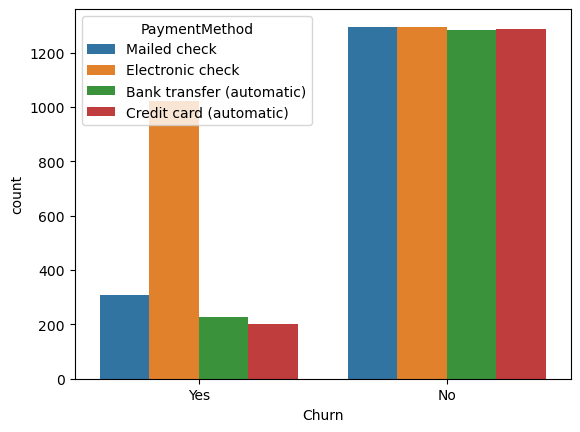

In [58]:
sns.countplot(x='Churn', hue='PaymentMethod', data=data)
plt.show()

- There is a high churn rate for customers using electronic check as a payment method.

 Advicing customers not to use electroni check might reduce the churn rate.                            

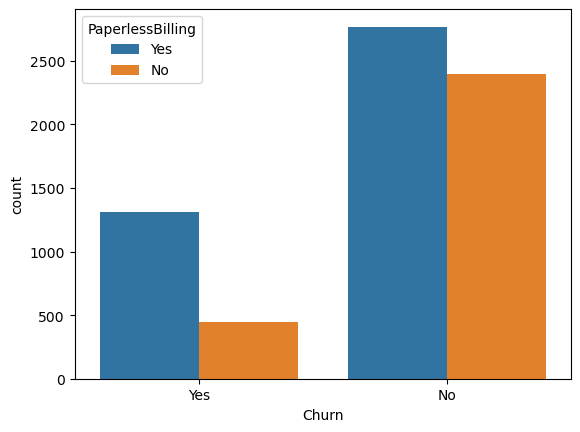

In [59]:
sns.countplot(x='Churn', hue='PaperlessBilling', data=data)
plt.show()

Paperless biling is no a factor.

In [60]:
data.drop(['PaperlessBilling'], inplace=True, axis=1)
data.head()

,Partner,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MultipleLines_encoded,avarage
2,No,2,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Mailed check,53.85,108.15,Yes,0,54.075000
4,No,2,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Electronic check,70.70,151.65,Yes,0,75.825000
5,No,8,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Electronic check,99.65,820.50,Yes,1,102.562500
8,Yes,28,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Electronic check,104.80,3046.05,Yes,1,108.787500
13,No,49,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Bank transfer (automatic),103.70,5036.30,Yes,1,102.781633


In [61]:
data.drop(['MultipleLines'], inplace=True, axis=1)
data.head()

,Partner,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MultipleLines_encoded,avarage
2,No,2,DSL,Yes,Yes,No,No,No,No,Month-to-month,Mailed check,53.85,108.15,Yes,0,54.075000
4,No,2,Fiber optic,No,No,No,No,No,No,Month-to-month,Electronic check,70.70,151.65,Yes,0,75.825000
5,No,8,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Electronic check,99.65,820.50,Yes,1,102.562500
8,Yes,28,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Electronic check,104.80,3046.05,Yes,1,108.787500
13,No,49,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Bank transfer (automatic),103.70,5036.30,Yes,1,102.781633


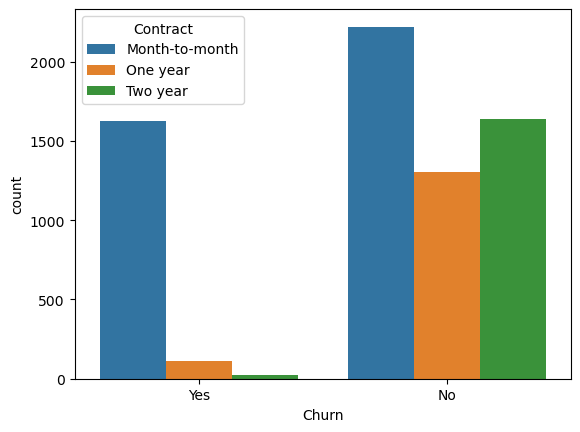

In [62]:
sns.countplot(x='Churn', hue='Contract', data=data)
plt.show()

contract type appears to be a significant factor in customer churn, with month-to-month contracts being associated with higher churn rates,
while longer-term contracts are associated with lower churn rates.

In [63]:
from sklearn.model_selection import train_test_split
#Split data into x and y
x = data.drop('Churn', axis=1)
y = data['Churn']
y = pd.get_dummies(y)
y = y.astype(int)


#split data into training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [64]:
x.head()

,Partner,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines_encoded,avarage
2,No,2,DSL,Yes,Yes,No,No,No,No,Month-to-month,Mailed check,53.85,108.15,0,54.075000
4,No,2,Fiber optic,No,No,No,No,No,No,Month-to-month,Electronic check,70.70,151.65,0,75.825000
5,No,8,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Electronic check,99.65,820.50,1,102.562500
8,Yes,28,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Electronic check,104.80,3046.05,1,108.787500
13,No,49,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Bank transfer (automatic),103.70,5036.30,1,102.781633


In [65]:
y.head()

,No,Yes
2,0,1
4,0,1
5,0,1
8,0,1
13,0,1


In [66]:
#Convert categorical columns into numbers
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

categorical_columns =  ['Partner','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',  'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot', one_hot, categorical_columns)], remainder='passthrough')
transformed_x = transformer.fit_transform(x)
transformed_x

array([[1.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        1.08150000e+02, 0.00000000e+00, 5.40750000e+01],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.51650000e+02, 0.00000000e+00, 7.58250000e+01],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        8.20500000e+02, 1.00000000e+00, 1.02562500e+02],
       ...,
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        7.36290000e+03, 1.00000000e+00, 1.02262500e+02],
       [0.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        3.46450000e+02, 1.00000000e+00, 3.14954545e+01],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        6.84450000e+03, 0.00000000e+00, 1.03704545e+02]])

In [67]:
pd.DataFrame(transformed_x)

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,2.0,53.85,108.15,0.0,54.075000
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,2.0,70.70,151.65,0.0,75.825000
2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,8.0,99.65,820.50,1.0,102.562500
3,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,28.0,104.80,3046.05,1.0,108.787500
4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,49.0,103.70,5036.30,1.0,102.781633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6918,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,72.0,21.15,1419.40,0.0,19.713889
6919,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,24.0,84.80,1990.50,1.0,82.937500
6920,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,72.0,103.20,7362.90,1.0,102.262500
6921,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,11.0,29.60,346.45,1.0,31.495455


In [17]:
dummies = pd.get_dummies(data[['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'Contract', 'PaymentMethod']])
dummies

,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,...,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,True,False,False,True,False,False,False,False,True,True,...,True,False,False,True,False,False,False,False,True,False
1,True,False,False,False,False,True,True,False,False,False,...,True,False,False,False,True,False,False,False,False,True
2,True,False,False,False,False,True,False,False,True,True,...,True,False,False,True,False,False,False,False,False,True
3,True,False,False,False,False,True,True,False,False,False,...,False,False,True,False,True,False,True,False,False,False
4,False,True,False,True,False,False,True,False,False,True,...,True,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,True,False,False,False,False,True,True,False,False,False,...,False,False,True,False,True,False,False,False,False,True
7039,False,True,False,True,False,False,False,False,True,False,...,True,False,False,False,True,False,False,True,False,False
7040,True,False,False,False,False,True,True,False,False,True,...,True,False,False,True,False,False,False,False,True,False
7041,False,True,False,True,False,False,True,False,False,True,...,True,False,False,True,False,False,False,False,False,True


In [68]:
x_train, x_test, y_train, y_test = train_test_split(transformed_x, y, test_size=0.2)


In [69]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

model = RandomForestClassifier()
model.fit(x_train, y_train)


RandomForestClassifier()

In [70]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(x_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))


Accuracy: 0.7870036101083032
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1015
           1       0.63      0.51      0.57       370

   micro avg       0.79      0.79      0.79      1385
   macro avg       0.73      0.70      0.71      1385
weighted avg       0.78      0.79      0.78      1385
 samples avg       0.79      0.79      0.79      1385



C:\Users\MUSTAFA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Explain the predictions using SHAP

In [71]:
import shap

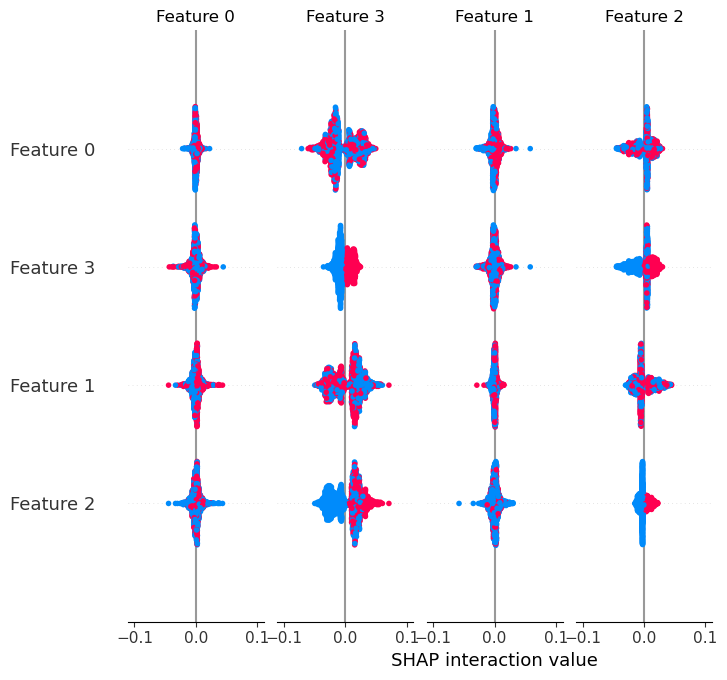

In [72]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_test)

shap.summary_plot(shap_values, x_test)